In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math
from scipy import linalg, optimize
from scipy.signal import argrelextrema
from scipy.optimize.minpack import curve_fit



     Time [m]     P2nor        P3     P5nor        P6        P7        P8  \
0         1.0  0.204662  0.197669  0.204900  0.224188  0.180142  0.156366   
1         2.0  0.205400  0.197654  0.204508  0.227421  0.180449  0.155598   
2         3.0  0.204312  0.198464  0.204570  0.225960  0.180461  0.155916   
3         4.0  0.204928  0.198552  0.203967  0.224172  0.180279  0.155991   
4         5.0  0.206021  0.198599  0.203618  0.225218  0.180167  0.157059   
..        ...       ...       ...       ...       ...       ...       ...   
255       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
256       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
257       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
258       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
259       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          WT1  WT#7 fer  WT#1 fer  ACA_average  
0    0.219814  0.212469   

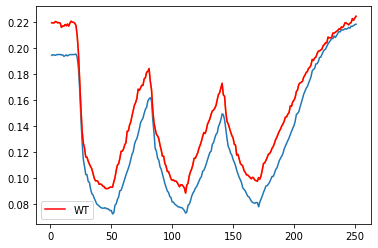

In [2]:
#reading the raw data file, deleting
df = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Data\Analysed\Normalised\Normalised data.csv')



#Making the raw data figure
fig1 = plt.figure()
ax1=fig1.add_subplot(1,1,1)

#Calculating the mean of all ACA2
df['ACA_average'] = df[['P2nor','P3','P5nor','P6','P7','P8']].mean(axis=1)
df["WT1"] =df[['WT1','WT#7 fer']].mean(axis=1)

print(df)


ax1.plot(df['Time [m]'], df['ACA_average'])
ax1.plot(df['Time [m]'], df["WT1"])




#find peaks that are 30 x values way from each other, amd must be higher than 0.06
ACApeaks = sc.signal.find_peaks(df['ACA_average'], height=0.06, distance=25)

print(ACApeaks)


#Still trying to find minimum
#Series.idxmin(axis=0, skipna=True, *args, **kwargs)



ax1.plot(df['Time [m]'],df['WT1'], "red", label="WT")

plt.legend()




     Time [m]  ACA_average  obs3
204     205.0     0.154864   0.0
205     206.0     0.157904   1.0
206     207.0     0.161405   2.0
207     208.0     0.164621   3.0
208     209.0     0.166964   4.0
209     210.0     0.169239   5.0
210     211.0     0.170614   6.0
211     212.0     0.173138   7.0
212     213.0     0.175603   8.0
213     214.0     0.178055   9.0
214     215.0     0.182559  10.0
215     216.0     0.183929  11.0
216     217.0     0.184481  12.0
217     218.0     0.188068  13.0
218     219.0     0.188179  14.0
219     220.0     0.189699  15.0
220     221.0     0.193001  16.0
221     222.0     0.193239  17.0
222     223.0     0.195283  18.0
223     224.0     0.197461  19.0
224     225.0     0.198887  20.0
225     226.0     0.199517  21.0
226     227.0     0.201456  22.0
227     228.0     0.203462  23.0
228     229.0     0.204868  24.0
229     230.0     0.206112  25.0
230     231.0     0.207680  26.0
231     232.0     0.207493  27.0
232     233.0     0.209618  28.0
233     23

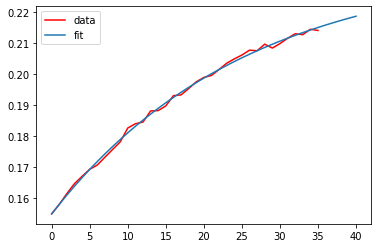

In [3]:
# this box fits the last opening to a exponential curve ACA


#extracting the data we want
open3 = df[(df["Time [m]"] >= 205) & (df['Time [m]']<=240)][["Time [m]","ACA_average"]]

#adding a column with new values from 0-72
open3['obs3'] = open3['Time [m]'] - open3.iat[0,0]



print(open3)


#define the function
def expo(x, y0, p, b):
    y = y0 + (p)*(1-np.exp(-b*x))
    return (y)


def sigmoid(x, L ,x0, k,y0):
    y = L / ((1 + np.exp(-k*(x-x0))))+y0
    return (y)

#initial guessing
#p0 = [max(open3['gsw']), np.median(open3['obs3']),1,min(open3['gsw'])] # this is an mandatory initial guess

#fititng the curve
popt3, pcov3 = curve_fit(expo, open3['obs3'], open3['ACA_average'])

#Printing pop1 values


#print(exp1)





fig2 = plt.figure()
ax2=fig2.add_subplot(1,1,1)


#plotting data

ax2.plot(open3['obs3'], open3['ACA_average'], color='r', label="data")


#plotting line of best fit
fit3x = np.linspace(0, 40, 40)
fit3y = expo(fit3x, *popt3)

ax2.plot(fit3x,fit3y, label='fit')

plt.legend(loc='best')

# Getting sums of squares and R squared
residuals3 = open3['ACA_average']- expo(open3['obs3'], *popt3)
ss_res3 = np.sum(residuals3**2)

ss_tot3 = np.sum((open3['ACA_average']-np.mean(open3['ACA_average']))**2)

r_squared3 = 1 - (ss_res3 / ss_tot3)


print(popt3)            

0.15483300778967926 0.08048857159232115
[0.10710586 0.04528155]


<ipython-input-4-287aaf9722a3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open2['obs2'] = open2['Time [m]'] - (open2.iat[0,0])


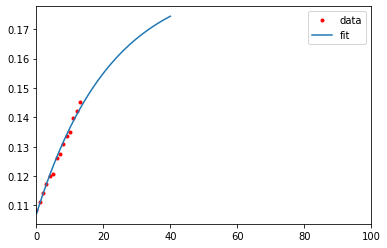

In [4]:
#This box makes the datafile open2, which is the second opening



preobs2=df[["Time [m]","ACA_average"]]


open2=preobs2[(preobs2["Time [m]"] >=127 ) & (preobs2['Time [m]']<=140)]

#adding a column with new values from 0-72

open2['obs2'] = open2['Time [m]'] - (open2.iat[0,0])



fig3 = plt.figure()
ax3=fig3.add_subplot(1,1,1)

ax3.plot(open2['obs2'], open2['ACA_average'],"." , color='r',  label="data")
ax3.set_xlim(0,100)


#define the function

def expo(x, y0, p, b):
    y = y0 + (p)*(1-np.exp(-b*x))
    return (y)

print(popt3[0], popt3[1])

def expo2(x, y0, b):
    y = y0 + (popt3[1])*(1-np.exp(-b*x))   
    return (y)


def sigmoid2(x,x0):
    y = popt3[0] / (1 + np.exp(-popt3[3]*(x-x0))/popt3[2])+popt3[4]
    return (y)

#initial guess


popt2, pcov2 = curve_fit(expo2, open2['obs2'], open2['ACA_average'])


#make sigmoidal curve 2



fit2x = np.linspace(0, 40, 40)

fit2y = expo2(fit2x, *popt2)


ax3.plot(fit2x, fit2y, label='fit')


plt.legend(loc='best')



# Getting sums of squares and R squared
residuals2 = open2['ACA_average']- expo2(open2['obs2'], *popt2)
ss_res2 = np.sum(residuals2**2)

ss_tot2 = np.sum((open2['ACA_average']-np.mean(open2['ACA_average']))**2)

r_squared2 = 1 - (ss_res2 / ss_tot2)

print(popt2)

<ipython-input-5-4579a88cb90c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open1['obs1'] = np.arange(open1.shape[0])


    Time [m]  ACA_average  obs1
64      65.0     0.110682     0
65      66.0     0.114649     1
66      67.0     0.118495     2
67      68.0     0.120535     3
68      69.0     0.125947     4
69      70.0     0.128956     5
70      71.0     0.130458     6
71      72.0     0.134357     7
72      73.0     0.138074     8
73      74.0     0.142736     9
74      75.0     0.144763    10
75      76.0     0.146297    11
76      77.0     0.150069    12
77      78.0     0.153108    13
78      79.0     0.154672    14
79      80.0     0.159485    15
80      81.0     0.161111    16
[0.10895203 0.05959526]


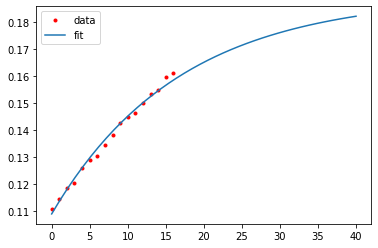

In [5]:
#This box makes the datafile open1, which is the first opening



preobs1=df[["Time [m]","ACA_average"]]

open1=preobs1[(preobs1["Time [m]"] >= 65) & (preobs1['Time [m]']<=81)]



#adding a column with new values from 0-72
open1['obs1'] = np.arange(open1.shape[0])

print(open1)

fig4 = plt.figure()
ax4=fig4.add_subplot(1,1,1)

ax4.plot(open1['obs1'], open1['ACA_average'], ".", color='r', label="data")



#fitting sigmoidal curve

#use same function as 2nd opening


#p01 = [0.07]

popt1, pcov1 = curve_fit(expo2, open1['obs1'], open1['ACA_average'])







#extrapolate using the new values
fit1x = np.linspace(0, 40, 40)
fit1y = (expo2(fit1x, *popt1))


ax4.plot(fit1x, fit1y, label='fit')

plt.legend(loc='best')


print(popt1)


# Getting sums of squares and R squared
residuals1 = open1['ACA_average']- expo2(open1['obs1'], *popt1)
ss_res1 = np.sum(residuals2**2)

ss_tot1 = np.sum((open1['ACA_average']-np.mean(open1['ACA_average']))**2)

r_squared1 = 1 - (ss_res1 / ss_tot1)



x0 = 0.08048857159232115
x1 = 0.04528154782175077
x2 = 0.0595952550864918
r_squared 3 =  0.9980905557384956
r_squared 2 = 0.9882722762104387
r_squared 1 = 0.9948557969182588


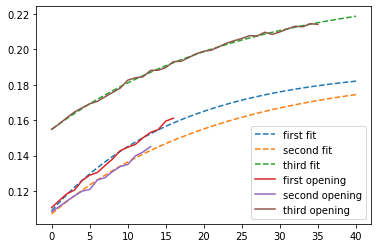

In [6]:
fig5 = plt.figure()
ax5=fig5.add_subplot(1,1,1)

ax5.plot(fit1x, fit1y,"--", label="first fit" )
ax5.plot(fit1x, fit2y, "--", label="second fit")
ax5.plot(fit1x, fit3y, "--", label="third fit")
ax5.plot(open1['obs1'], open1['ACA_average'], label="first opening")
ax5.plot(open2['obs2'], open2['ACA_average'],label="second opening")
ax5.plot(open3['obs3'], open3['ACA_average'], label="third opening")

plt.legend()

print("x0 =", popt3[1])
print("x1 =", popt2[1])
print("x2 =", popt1[1])

print("r_squared 3 = ", r_squared3)

print("r_squared 2 =", r_squared2)
print("r_squared 1 =", r_squared1)

#################### Getting sums of squares






     Time [m]       WT1  time3
210     211.0  0.182164    0.0
211     212.0  0.184624    1.0
212     213.0  0.185439    2.0
213     214.0  0.187121    3.0
214     215.0  0.191533    4.0
215     216.0  0.190676    5.0
216     217.0  0.192656    6.0
217     218.0  0.193242    7.0
218     219.0  0.195874    8.0
219     220.0  0.197800    9.0
220     221.0  0.197999   10.0
221     222.0  0.198841   11.0
222     223.0  0.199466   12.0
223     224.0  0.202043   13.0
224     225.0  0.202916   14.0
225     226.0  0.204419   15.0
226     227.0  0.204219   16.0
227     228.0  0.208702   17.0
228     229.0  0.208155   18.0
229     230.0  0.208172   19.0
230     231.0  0.208514   20.0
231     232.0  0.211799   21.0
232     233.0  0.211678   22.0
233     234.0  0.212384   23.0
234     235.0  0.213145   24.0
235     236.0  0.213820   25.0
236     237.0  0.215062   26.0
237     238.0  0.214735   27.0
238     239.0  0.216490   28.0
239     240.0  0.216126   29.0
[0.1823965  0.05478827 0.03417824]
0.99

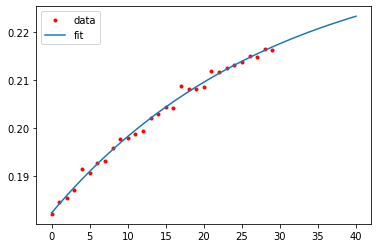

In [7]:
#This box makes the datafile open3, which is the third opening




WTopen3 = df[(df["Time [m]"] > 210) & (df['Time [m]']<=240)][["Time [m]","WT1"]]



#adding a column with new values from 0-72

WTopen3['time3'] = WTopen3['Time [m]'] - WTopen3.iat[0,0]

print(WTopen3)




WTpopt3, WTpcov3 = curve_fit(expo, WTopen3['time3'], WTopen3['WT1'])




fig8 = plt.figure()
ax8=fig8.add_subplot(1,1,1)

ax8.plot(WTopen3['time3'], WTopen3['WT1'], ".", color='r', label="data")


#extrapolate using the new values
WTfit3x = np.linspace(0, 40, 40)
WTfit3y = expo(WTfit3x, *WTpopt3)






ax8.plot(WTfit3x, WTfit3y, label='fit')

plt.legend(loc='best')


print(WTpopt3)


# Getting sums of squares and R squared
WTresiduals3 = WTopen3['WT1']- expo(WTopen3['time3'], *WTpopt3)
WTss_res3 = np.sum(WTresiduals3**2)

WTss_tot3 = np.sum((WTopen3['WT1']-np.mean(WTopen3['WT1']))**2)

WTr_squared3 = 1 - (WTss_res3 / WTss_tot3)

print(WTr_squared3)
#print("a3=",popt3[0], "b3 =", popt3[1], "c3 =" , popt3[2])

     Time [m]       WT1  time2
126     127.0  0.134462    0.0
127     128.0  0.137191    1.0
128     129.0  0.141616    2.0
129     130.0  0.143790    3.0
130     131.0  0.145806    4.0
131     132.0  0.149391    5.0
132     133.0  0.151872    6.0
133     134.0  0.152583    7.0
134     135.0  0.154021    8.0
135     136.0  0.156098    9.0
136     137.0  0.160527   10.0
137     138.0  0.164471   11.0
138     139.0  0.165975   12.0
139     140.0  0.169446   13.0
[0.13364945 0.0683123 ]


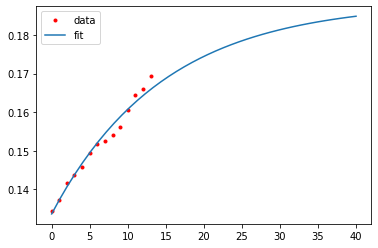

In [8]:
#This box makes the datafile open2, which is the second opening



WTopen2 = df[(df["Time [m]"] > 126) & (df['Time [m]']<=140)][["Time [m]","WT1"]]

#adding a column with new values from 0-72
WTopen2['time2'] = WTopen2['Time [m]'] - WTopen2.iat[0,0]

print(WTopen2)




def expo(x, y0, p, b):
    y = y0 + (p)*(1-np.exp(-b*x))
    return (y)


def WTexpo2(x, y0, b):
    y = y0 + (WTpopt3[1])*(1-np.exp(-b*x))   
    return (y)


#initial guess



WTpopt2, WTpcov2 = curve_fit(WTexpo2, WTopen2['time2'], WTopen2['WT1'])

#make sigmoidal curve 2

fig7 = plt.figure()
ax7=fig7.add_subplot(1,1,1)
                         

ax7.plot(WTopen2['time2'], WTopen2['WT1'], ".", color='r', label="data")

WTfit2x = np.linspace(0, 40, 40)
WTfit2y = WTexpo2(WTfit2x, *WTpopt2)


ax7.plot(WTfit2x, WTfit2y, label='fit')

plt.legend(loc='best')





# Getting sums of squares and R squared
WTresiduals2 = WTopen2['WT1']- WTexpo2(WTopen2['time2'], *WTpopt2)
WTss_res2 = np.sum(WTresiduals2**2)

WTss_tot2 = np.sum((WTopen2['WT1']-np.mean(WTopen2['WT1']))**2)

WTr_squared2 = 1 - (WTss_res2 / WTss_tot2)

print(WTpopt2)




    Time [m]       WT1  time1
62      63.0  0.136189    0.0
63      64.0  0.136526    1.0
64      65.0  0.141081    2.0
65      66.0  0.143471    3.0
66      67.0  0.148133    4.0
67      68.0  0.152287    5.0
68      69.0  0.156361    6.0
69      70.0  0.158412    7.0
70      71.0  0.161507    8.0
71      72.0  0.168575    9.0
72      73.0  0.167667   10.0
73      74.0  0.169526   11.0
74      75.0  0.171619   12.0
[0.13255091 0.09733623]


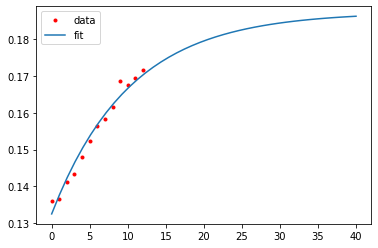

In [9]:
# this box fits the WT first opening

WTopen1 = df[(df["Time [m]"] > 62 ) & (df['Time [m]']<=75)][["Time [m]","WT1"]]

WTopen1['time1'] = WTopen1['Time [m]'] - WTopen1.iat[0,0]

print(WTopen1)

fig6 = plt.figure()
ax6=fig6.add_subplot(1,1,1)


#plotting data

ax6.plot(WTopen1['time1'], WTopen1['WT1'],"." ,color='r', label="data")



#initial guessing
#p0 = [0.2, 0.25, 0.08] # this is an mandatory initial guess

#fititng the curve
WTpopt1, WTpcov1 = curve_fit(WTexpo2, WTopen1['time1'], WTopen1['WT1'])



#plotting line of best fit
WTfit1x = np.linspace(0, 40, 40 )
WTfit1y = WTexpo2(WTfit1x, *WTpopt1)



ax6.plot(WTfit1x,WTfit1y, label='fit')

plt.legend(loc='best')

# Getting sums of squares and R squared
WTresiduals1 = WTopen1['WT1']- WTexpo2(WTopen1['time1'], *WTpopt1)
WTss_res1 = np.sum(WTresiduals1**2)

WTss_tot1 = np.sum((WTopen1['WT1']-np.mean(WTopen1['WT1']))**2)

WTr_squared1 = 1 - (WTss_res1 / WTss_tot1)

print(WTpopt1)
            
            

third opening = 0.05478827126312057
second closing = 0.06831229803913101
first closing = 0.09733623098263033
r_squared 3 =  0.9980905557384956
r_squared 2 = 0.9882722762104387
r_squared 1 = 0.9948557969182588


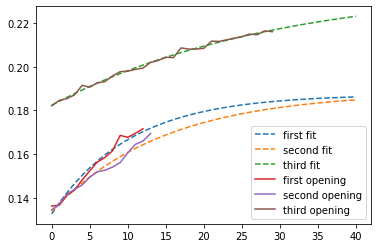

In [10]:
fig7 = plt.figure()
ax7=fig7.add_subplot(1,1,1)

ax7.plot(WTfit1x, WTfit1y,"--", label="first fit" )
ax7.plot(WTfit2x, WTfit2y, "--", label="second fit")
ax7.plot(WTfit3x, WTfit3y, "--", label="third fit")
ax7.plot(WTopen1['time1'], WTopen1['WT1'], label="first opening")
ax7.plot(WTopen2['time2'], WTopen2['WT1'],label="second opening")
ax7.plot(WTopen3['time3'], WTopen3['WT1'], label="third opening")

plt.legend()

print("third opening =", WTpopt3[1])
print("second closing =", WTpopt2[1])


print("first closing =", WTpopt1[1])

print("r_squared 3 = ", r_squared3)

print("r_squared 2 =", r_squared2)
print("r_squared 1 =", r_squared1)

#################### Getting sums of squares





In [11]:
#Get half life by dividing 0.693 over b
# these are average half lives


b3 = popt3[2]
b2 = popt2 [1]
b1 = popt1 [1]

hl1 = (0.693/b1) #* 0.693
hl2 = (0.693/b2) #* 0.693
hl3 = (0.693/b3) #* 0.693



WTb3 = WTpopt3[2]
WTb2 = WTpopt2[1]
WTb1 = WTpopt1[1]

WThl1 = (0.693/WTb1) #* 0.693
WThl2 = (0.693/WTb2) #* 0.693
WThl3 = (0.693/WTb3) #* 0.693

print(WThl3)


20.276059835127736


In [12]:
#Error bars:


half_lives = {"first":[ 11.03966532469972, 7.231664529769211, 14.253425927367731 , 22.221402711457415 ,  12.395685294915916],
             "second":[19.39020024811813, 7.4199998451981, 16.219136304784513, 28.371787790005413, 8.92145083671232],
             "third":[13.294294405829174,11.680456259011649, 15.754182708758627, 25.10752160005038, 24.11242333200687]}    

 
half_livesdf = pd.DataFrame(half_lives, index=np.arange(0,5,1))  

print(half_livesdf )
    

print(half_livesdf['first'].std())


#half_livesdf.loc[len(half_livesdf.index)] = [half_livesdf['first'].std(),half_livesdf['second'].std(),half_livesdf['third'].std()]

std=[half_livesdf['first'].std(),half_livesdf['second'].std(),half_livesdf['third'].std()]

print(std)

#print(half_livesdf )
    


       first     second      third
0  11.039665  19.390200  13.294294
1   7.231665   7.420000  11.680456
2  14.253426  16.219136  15.754183
3  22.221403  28.371788  25.107522
4  12.395685   8.921451  24.112423
5.549091095817883
[5.549091095817883, 8.489759442226498, 6.2249910268656725]


In [20]:
WThalf_lives = {"first":[4.552696709592066, 11.098539342868921],
             "second":[5.218877717155037, 11.653535750450285],
             "third":[17.341932407437273,17.812375128656164]}    


WThalf_livesdf = pd.DataFrame(WThalf_lives, index=np.arange(0,2,1))  

print(WThalf_livesdf)

WTstd=[WThalf_livesdf['first'].std(),WThalf_livesdf['second'].std(),WThalf_livesdf['third'].std()]

print(WTstd)


       first     second      third
0   4.552697   5.218878  17.341932
1  11.098539  11.653536  17.812375
[4.6286097145700715, 4.549990329959563, 0.3326532383337304]


In [13]:


#Fitdf = pd.DataFrame(fit1y, fit2y, fit3y, WTfit1y, WTfit2y, WTfit3y)

print(len(fit1y), len(fit2y), len(fit3y), len(WTfit1y), len(WTfit2y), len(WTfit3y))

data={'fit1':fit1y,
     'fit2':fit2y,
     'fit3':fit3y,
     'WTfit1':WTfit1y,
     'WTfit2':WTfit2y,
     'WTfit3':WTfit3y}

fitdf = pd.DataFrame(data, index=np.arange(0,40,1))

# substract the smallest number of all of them, then divide them all by the largerst numer

#fitdf['fit1nor']= fit1-"a certain value"

np.array(fitdf)

print(fitdf)

fit_elts = [fit1y, fit2y, fit3y, WTfit1y, WTfit2y, WTfit3y]

def make_array(data):
    return np.array(data)[:,None]

fit_arrays = []
wtfit_arrays = []

for elt in fit_elts:
    row_1 = elt[0]
    array = make_array(elt)
    array = array - row_1
    first = array[-1,0]
    array = array/first
    fit_arrays.append(array)
    
to_stack = tuple(fit_arrays)

joined = np.hstack(to_stack)
print(joined)


40 40 40 40 40 40
        fit1      fit2      fit3    WTfit1    WTfit2    WTfit3
0   0.108952  0.107106  0.154833  0.132551  0.133649  0.182396
1   0.113724  0.110758  0.158016  0.137756  0.137357  0.184284
2   0.118214  0.114245  0.161072  0.142467  0.140813  0.186106
3   0.122437  0.117574  0.164008  0.146731  0.144036  0.187866
4   0.126410  0.120752  0.166828  0.150589  0.147040  0.189565
5   0.130147  0.123785  0.169536  0.154080  0.149841  0.191205
6   0.133663  0.126681  0.172137  0.157240  0.152453  0.192789
7   0.136970  0.129445  0.174636  0.160100  0.154888  0.194318
8   0.140081  0.132084  0.177035  0.162688  0.157158  0.195795
9   0.143008  0.134603  0.179340  0.165030  0.159275  0.197221
10  0.145761  0.137008  0.181553  0.167150  0.161248  0.198597
11  0.148351  0.139303  0.183679  0.169068  0.163088  0.199926
12  0.150787  0.141495  0.185721  0.170804  0.164803  0.201210
13  0.153079  0.143587  0.187682  0.172375  0.166402  0.202449
14  0.155235  0.145584  0.189566  0.1

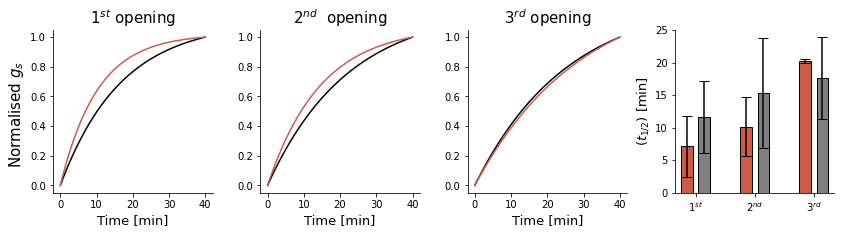

In [26]:
fig8, axs = plt.subplots(1, 4, figsize=(14,3))

fig8.subplots_adjust(wspace=0.3)

axs[0].plot(fit1x, joined[:,0], label="ACA2", color="black" )
axs[0].plot(WTfit1x, joined[:,3], label="WT-Col-0", color="#CD5B45" )

axs[1].plot(fit2x, joined[:,1],  label="ACA2", color="black")
axs[1].plot(WTfit2x, joined[:,4],  label="Col-0", color="#CD5B45")

axs[2].plot(fit3x, joined[:,2],  label="ACA2", color="black")
axs[2].plot(WTfit3x, joined[:,5],  label="WT-Col-0", color="#CD5B45")

axs[0].set_title("$1^{st}$ opening", size=15)
axs[1].set_title("$2^{nd}$  opening", size=15)
axs[2].set_title("$3^{rd}$ opening", size=15)

axs[0].set_ylabel("Normalised $g_{s}$  ", size=15)
axs[0].set_xlabel("Time [min]")

width = 0.4

axs[3].bar((np.arange(1,6,2))-width/2, [hl1,hl2,hl3], width, color="grey",edgecolor="black", yerr=std, capsize=5, label="ACA2")
axs[3].bar((np.arange(0,6,2))+width/2, [WThl1,WThl2,WThl3], width, color="#CD5B45",edgecolor="black",yerr=WTstd, capsize=5, label="WT-Col0")
axs[3].set_xticks([0.5,2.5,4.5], ['$1^{st}$', '$2^{nd}$', '$3^{rd}$'])

#axs[0].legend(frameon=False)
#axs[3].legend(frameon=False)

#iterating over all axes and setting the xlabel to time
#iterating over all axes and setting the xlabel to time
for ax in axs.flat:
    ax.set_xlabel('Time [min]', size=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    
    
#plt.legend(frameon=False)


axs[3].set_xlabel("", size=13)
axs[3].set_xlim(-0.2,5.2)
    

axs[3].set_ylabel("($t_{1/2}$) [min]", size=13)

    
plt.savefig('Graphs/11_01_2022_by_opening.jpeg', dpi=400, bbox_inches='tight')

